## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

**Libaries importing process**

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

**Image Re-Scaling**

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


**Import the Inception V3 library and add preprocessing layer to the front of Inception**

In [4]:
# Here I will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

**Don't train existing weights**

In [5]:
for layer in inception.layers:
    layer.trainable = False

**Useful for getting number of output classes**

In [6]:
folders = glob('Datasets/train/*')

**MY layers - you can add more if you want**

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

**View the structure of the model**

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

**Cost and Optimization method to use**

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Use the Image Data Generator to import the images from the dataset**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


## Model Fiting Process 

In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 64s 1s/step - loss: 1.7751 - accuracy: 0.6827 - val_loss: 2.3840 - val_accuracy: 0.6667
Epoch 2/20
61/61 [==============================] - 53s 865ms/step - loss: 0.6949 - accuracy: 0.8309 - val_loss: 3.5912 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 53s 866ms/step - loss: 0.4392 - accuracy: 0.8975 - val_loss: 5.2293 - val_accuracy: 0.6111
Epoch 4/20
61/61 [==============================] - 53s 869ms/step - loss: 0.5337 - accuracy: 0.8749 - val_loss: 4.3477 - val_accuracy: 0.5556
Epoch 5/20
61/61 [==============================] - 53s 867ms/step - loss: 0.4529 - accuracy: 0.8893 - val_loss: 3.3089 - val_accuracy: 0.5556
Epoch 6/20
61/61 [==============================] - 53s 873ms/step - loss: 0.2859 - accuracy: 0.9257 - val_loss: 2.4293 -

In [15]:
import matplotlib.pyplot as plt

## Ploting Process 

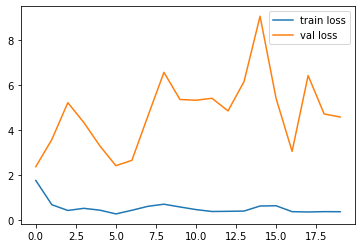

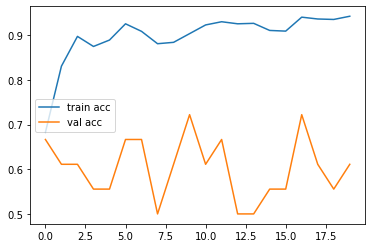

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Model Saiving Process 

In [17]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[7.4209914e-20, 9.9822479e-01, 1.7749737e-03, 2.0148342e-07],
       [1.1207291e-18, 6.4242876e-01, 2.6980211e-04, 3.5730144e-01],
       [3.7225113e-18, 5.2763654e-14, 8.3266478e-03, 9.9167341e-01],
       [3.5216738e-17, 6.3921298e-08, 9.9999952e-01, 3.3582205e-07],
       [5.7395469e-12, 9.9998033e-01, 7.7708009e-06, 1.1890431e-05],
       [9.4032697e-21, 1.4968497e-11, 9.9982303e-01, 1.7704233e-04],
       [1.5613883e-38, 1.0000000e+00, 4.4897107e-24, 6.6743096e-15],
       [1.5651403e-07, 1.0263543e-14, 1.0521172e-03, 9.9894780e-01],
       [2.0443420e-11, 2.0648517e-16, 9.9999940e-01, 6.3969492e-07],
       [2.2948694e-31, 9.9999952e-01, 3.5534780e-11, 4.2804714e-07],
       [2.0070366e-10, 2.3023200e-11, 9.9978024e-01, 2.1980096e-04],
       [3.1753273e-30, 1.0000000e+00, 2.0008619e-20, 5.3158674e-15],
       [5.5093010e-19, 2.3925154e-01, 2.5375650e-07, 7.6074815e-01],
       [6.2956998e-35, 9.9999130e-01, 4.0540615e-13, 8.6850205e-06],
       [4.6669889e-26, 9.0130792e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2, 1, 2, 3], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_inception.h5')

In [26]:
img=image.load_img('Datasets/test/diseased cotton plant/dd (41).jpg',target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[ 97.,  82.,  61.],
        [ 71.,  59.,  37.],
        [ 98.,  83.,  62.],
        ...,
        [ 89., 149.,  63.],
        [ 91., 154.,  63.],
        [ 92., 154.,  68.]],

       [[ 63.,  54.,  37.],
        [ 54.,  46.,  33.],
        [ 68.,  59.,  42.],
        ...,
        [ 88., 150.,  64.],
        [ 89., 152.,  63.],
        [ 82., 144.,  58.]],

       [[ 48.,  38.,  26.],
        [ 58.,  49.,  34.],
        [ 76.,  67.,  50.],
        ...,
        [ 93., 153.,  67.],
        [ 82., 145.,  56.],
        [ 90., 150.,  64.]],

       ...,

       [[ 54.,  47.,  29.],
        [ 52.,  47.,  28.],
        [ 57.,  50.,  32.],
        ...,
        [ 38.,  38.,  26.],
        [ 36.,  34.,  22.],
        [ 50.,  46.,  34.]],

       [[ 58.,  51.,  35.],
        [ 34.,  31.,  14.],
        [ 50.,  44.,  28.],
        ...,
        [ 68.,  62.,  46.],
        [ 41.,  38.,  23.],
        [ 44.,  38.,  26.]],

       [[ 63.,  69.,  35.],
        [ 41.,  38.,  21.],
        [ 29.,  

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[6.2803489e-01, 8.8572558e-03, 3.1288666e-05, 3.6307657e-01]],
      dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a==1

array([False])

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.1.0'

In [36]:
img_data

array([[[[-0.99701655, -0.9974779 , -0.9981238 ],
         [-0.9978162 , -0.99818534, -0.99886197],
         [-0.9969858 , -0.99744713, -0.99809307],
         ...,
         [-0.9972626 , -0.9954171 , -0.9980623 ],
         [-0.9972011 , -0.99526334, -0.9980623 ],
         [-0.9971703 , -0.99526334, -0.9979085 ]],

        [[-0.9980623 , -0.9983391 , -0.99886197],
         [-0.9983391 , -0.99858516, -0.998985  ],
         [-0.9979085 , -0.99818534, -0.9987082 ],
         ...,
         [-0.99729335, -0.99538636, -0.9980315 ],
         [-0.9972626 , -0.99532485, -0.9980623 ],
         [-0.9974779 , -0.99557096, -0.9982161 ]],

        [[-0.99852365, -0.9988312 , -0.9992003 ],
         [-0.9982161 , -0.9984929 , -0.99895424],
         [-0.9976624 , -0.9979392 , -0.99846214],
         ...,
         [-0.9971396 , -0.9952941 , -0.9979392 ],
         [-0.9974779 , -0.9955402 , -0.9982776 ],
         [-0.99723184, -0.99538636, -0.9980315 ]],

        ...,

        [[-0.9983391 , -0.9985544 , -0